# Introduction to Data Science
## Homework 3

Student Name: 

Student Netid: 
***

### Part 1 - Preparing a Training Set and Training a Decision Tree (Total 10 Points)
This is a hands-on task where we build a predictive model using Decision Trees. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the dataset's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is to split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function from numpy but do not use the data splitting functions from Sklearn.<br><br>

(2 Points)

In [26]:
#Place your code here
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('cell2cell_data.csv')
dfrand = df1.sample(frac=1)

#print(dfrand)
train_df = dfrand[:int(0.8*len(df1))]
test_df = dfrand[int(0.8*len(df1)):]
#print(len(train_df))
#print(len(test_df))
#Data has been split

2\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

(1 Point)

In [37]:
#Place your code here
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

colnames=['revenue','outcalls','incalls','months','eqpdays','webcap','marryyes','travel','pcown','creditcd','retcalls']

f_train=train_df[colnames]
#print(f_train)
#print(train_df)
f_test=test_df[colnames]

target_train=train_df.churndep
target_test=test_df.churndep

ivern=DecisionTreeClassifier(criterion='entropy')
ivern=ivern.fit(f_train,target_train)

#ans=ivern.predict(f_test)
#print(ans)

3\. Using the resulting model from 2.2, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

(3 Points)

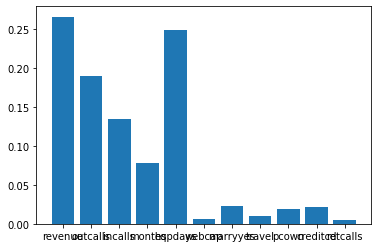

In [30]:
#Place your code here
fimport=ivern.feature_importances_
x=colnames
y=fimport
plt.bar(x,y)
plt.show()

4\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

(2 Points)

In [31]:
#Place your code here 

<p>
<span style="color:blue">
The relationship between the top 3 most important features and churndep is positive. 
Customers who earn more seem to be the customers who churn. Customers who have used the equipment longest and customers with the most outbound calls also seem to be the ones who are more likely to churn.
It could be possible that, people who earn a higher revenue churn because they can afford to keep changing their mobile plans or also that they now earn enough to switch to a company that's even costlier and claims to provide better. 
People who kept the equipment the longest seem to churn possibly meaning that they finished a longterm subscription which is what kept them with the company all this while. 
People with most outbound calls seems to correlate with the previous feature (people whos have had their equipment the longest). Having the equipment for a longer time most definitely also means that more outbound calls will have been made. Makes even more sense when we look at inbound calls feature which falls right at 4th place. 
</span>
</p>

5\. Using the classifier built in 2.2, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each? Remember: accuracy is the fraction of predictions whose labels were gotten right by the model. What conclusions can you derive from this?

(2 Points)

In [44]:
#Place your code here
pred_test=ivern.predict(f_test)
#print(test_df.churndep)
#print(pred_test)

pred_train=ivern.predict(f_train)
#print(train_df.churndep)
#print(pred_train)

print("Accuracy of training sample:",metrics.accuracy_score(train_df.churndep, pred_train))
print("Accuracy of testing sample:",metrics.accuracy_score(test_df.churndep, pred_test))

#Accuracy of testing sample is too low. Therefore, we need to improve on our model.


Accuracy of training sample: 0.9998430929517353
Accuracy of testing sample: 0.5325718589180369


### Part 2 - Finding a Good Decision Tree (Total 10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters min_samples_split and min_samples_leaf. 

(1 Point)

In [117]:
#Place your code here
min_samples_split0 = np.random.randint(10, 500, size=10)
min_samples_split=np.sort(min_samples_split0)
min_samples_leaf0 = np.random.randint(1500, 2000, size=10)
min_samples_leaf=np.sort(min_samples_leaf0)
print(min_samples_split)
print(min_samples_leaf)

[ 42  60  96 136 159 218 260 276 345 371]
[1576 1627 1731 1747 1750 1809 1811 1908 1959 1965]


2\. Explain what your reasoning was for choosing the above ranges.

(1 Points)

<p>
<span style="color:blue">
Keeping a number too high will cause underfitting so the max is set at 10000. Keeping a number too low will cause overfitting which is why we are keeping it at above 1000. Our previous sample might have suffered from overfitting because it gave us a 99% accuracy in training sample but barely crossed 50 for test sample. 
</span>
</p>

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

(5 Points)

42
0.5824024099410067
42
0.5768796284674281
42
0.5800175724865069
42
0.5800175724865069
42
0.5800175724865069
42
0.5800175724865069
42
0.5800175724865069
42
0.5800175724865069
42
0.5800175724865069
42
0.5800175724865069


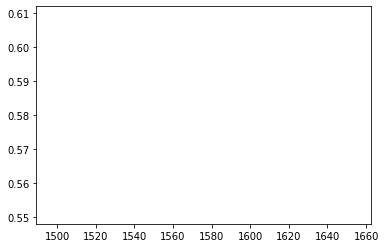

60
0.5824024099410067
60
0.5768796284674281
60
0.5800175724865069
60
0.5800175724865069
60
0.5800175724865069
60
0.5800175724865069
60
0.5800175724865069
60
0.5800175724865069
60
0.5800175724865069
60
0.5800175724865069


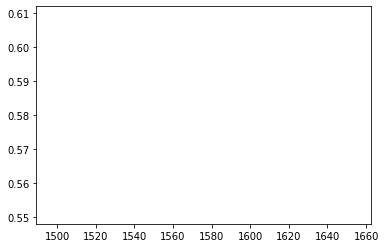

96
0.5824024099410067
96
0.5768796284674281
96
0.5800175724865069
96
0.5800175724865069
96
0.5800175724865069
96
0.5800175724865069
96
0.5800175724865069
96
0.5800175724865069
96
0.5800175724865069
96
0.5800175724865069


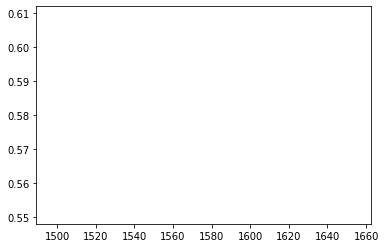

136
0.5824024099410067
136
0.5768796284674281
136
0.5800175724865069
136
0.5800175724865069
136
0.5800175724865069
136
0.5800175724865069
136
0.5800175724865069
136
0.5800175724865069
136
0.5800175724865069
136
0.5800175724865069


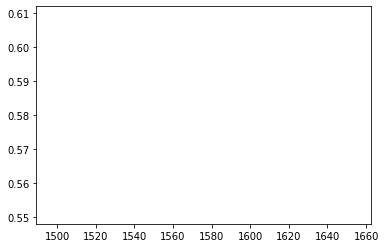

159
0.5824024099410067
159
0.5768796284674281
159
0.5800175724865069
159
0.5800175724865069
159
0.5800175724865069
159
0.5800175724865069
159
0.5800175724865069
159
0.5800175724865069
159
0.5800175724865069
159
0.5800175724865069


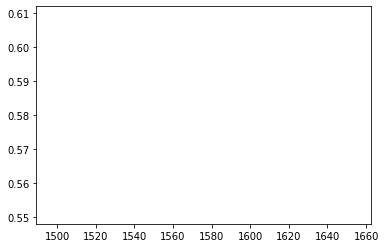

218
0.5824024099410067
218
0.5768796284674281
218
0.5800175724865069
218
0.5800175724865069
218
0.5800175724865069
218
0.5800175724865069
218
0.5800175724865069
218
0.5800175724865069
218
0.5800175724865069
218
0.5800175724865069


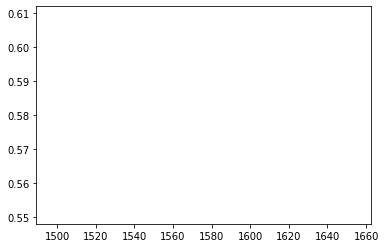

260
0.5824024099410067
260
0.5768796284674281
260
0.5800175724865069
260
0.5800175724865069
260
0.5800175724865069
260
0.5800175724865069
260
0.5800175724865069
260
0.5800175724865069
260
0.5800175724865069
260
0.5800175724865069


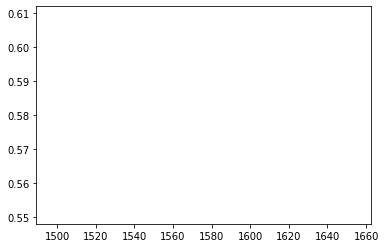

276
0.5824024099410067
276
0.5768796284674281
276
0.5800175724865069
276
0.5800175724865069
276
0.5800175724865069
276
0.5800175724865069
276
0.5800175724865069
276
0.5800175724865069
276
0.5800175724865069
276
0.5800175724865069


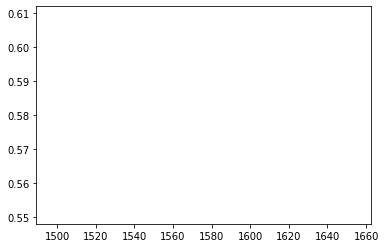

345
0.5824024099410067
345
0.5768796284674281
345
0.5800175724865069
345
0.5800175724865069
345
0.5800175724865069
345
0.5800175724865069
345
0.5800175724865069
345
0.5800175724865069
345
0.5800175724865069
345
0.5800175724865069


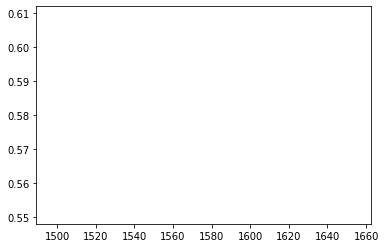

371
0.5824024099410067
371
0.5768796284674281
371
0.5800175724865069
371
0.5800175724865069
371
0.5800175724865069
371
0.5800175724865069
371
0.5800175724865069
371
0.5800175724865069
371
0.5800175724865069
371
0.5800175724865069


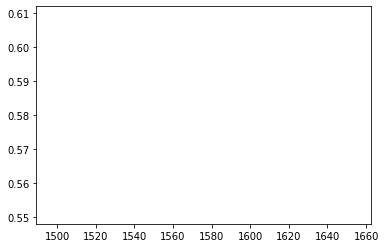

In [118]:
#Place your code here
train_data=[]
test_data=[]
col_names_leaf=min_samples_leaf.transpose()[0]
for x in min_samples_split:
    for y in min_samples_leaf:    
        daisy=DecisionTreeClassifier(min_samples_leaf=y, min_samples_split=x, criterion='entropy')
        daisy.fit(f_train, target_train)
        pred_train=daisy.predict(f_train)
        pred_test=daisy.predict(f_test)
        train_acc=metrics.accuracy_score(train_df.churndep, pred_train)
        #train_data.append(train_acc)
        train_data.append((x,train_acc))
        test_acc=metrics.accuracy_score(test_df.churndep, pred_test)
        #test_data.append(test_acc)
        test_data.append(test_acc)
        print(x)
        print(test_acc)
    
    plt.plot(col_names_leaf, test_acc, color ="red")
    plt.show()
#train_acc=metrics.accuracy_score(train_df.churndep, pred_train)
#test_acc=metrics.accuracy_score(test_df.churndep, pred_test)
#print(train_data)



4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

(1 Point)

<p>
<span style="color:blue">
The best accuracy comes from 42 min_samples_split and 1576 min_samples_leaf. This accuracy is 0.582.
</span>
</p>

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

(2 Points)

<p>
<span style="color:blue">
We could use the churn production model to know when the trigger point of churn for each user is nearing. At which, we can provide them a new offer for renewal to stay with our company. This could help retention of customers and improve the business.
</span>
</p>

### Part 3: Model selection with cross-validation (5 points)
In this part, we will focus on cross-validation to find a good value for parameter `max_depth`.


1\. Write a cross-validation function that does the following:
- Takes as inputs a dataset, a label name, # of splits/folds (`k`), and a sequence of values for the maximum depth of the tree (`max_depth`). 
- Shuffles the data.
- Splits the data into `k` folds according to the cross-validation logic
- Performs two loops
  - Outer Loop: `for each f in range(k)`:
    - Inner Loop: `for each value in max_depth_sequence`:
      - Trains a Decision Tree on the training split with the `max_depth=value` (USE criterion='entropy' BUT DO NOT ALTER THE OTHER PARAMETERS)
      - Computes accuracy_value_f on test split
      - Stores accuracy_value_f in a  dictionary of values
- Returns a dictionary, where each key-value pair is: `value:[accuracy_value_1,...,accuracy_value_k]`

(2 Points)

In [ ]:
#Place your code here
#Uncomment line below
#def xValDecisionTree(dataset, label_name, k, max_depth_sequence):

2\. Using the function written above, do the following:
- Generate a sequence `max_depth_sequence = [None, 2, 4, 8, 16, 32, 128, 256, 512]` (Note that None is the default value for this parameter).
2.	Call accs = xValDecisionTree(dataset, 'churndep', 10, `max_depth_sequence`)
3.  For each value in accs.keys(), calculate mean(accs[value]). What value is associated with the highest accuracy mean?
4.  For each value in accs.keys(), calculate the ranges mean(accs[value]) +/- std(accs[value]). Do the ranges associated with the value that has the highest mean(accs[value]) overlap with ranges for other values? What may this suggest and what are the limitations of a standard deviation based analysis in this scenario?

5.  Which depth value would you pick, if any, and why?

(3 Points)

In [ ]:
#Place your code and answers here. You can create more cells if you want.